### `EmbeddingGenerator`

```python
class EmbeddingGenerator:
```

> **Objetivo**
> Esta classe gera representações vetoriais (embeddings) a partir de descrições textuais de vídeos.
> Ela utiliza um modelo da biblioteca `SentenceTransformer` para transformar sentenças em vetores numéricos de alta dimensão, permitindo calcular similaridades semânticas entre textos.
>
> **Aplicação**
> Os embeddings são utilizados para construir grafos de similaridade, nos quais vídeos semanticamente próximos são conectados.
>
> **Parâmetros**
>
> * `model_name` (*str*, opcional): nome do modelo SentenceTransformer.
>   Se não for especificado, o modelo padrão `"distiluse-base-multilingual-cased-v2"` (multilíngue) será utilizado.
>
> **Métodos**
>
> * `generate(texts: List[str]) -> np.ndarray`:
>   Recebe uma lista de textos e retorna os embeddings correspondentes como um array NumPy.

---

### `KNNGraphBuilder`

```python
class KNNGraphBuilder:
```

> **Objetivo**
> Constrói um grafo de similaridade semântica entre vídeos a partir dos embeddings textuais.
> Cada nó representa um vídeo, e uma aresta é criada entre ele e seus `k` vizinhos mais semelhantes (com menor distância de cosseno).
>
> **Aplicação**
> Gera uma estrutura conectada onde relações entre vídeos são baseadas em semelhança semântica, útil para clustering e avaliação por caminhadas.
>
> **Parâmetros**
>
> * `k` (*int*): número de vizinhos mais próximos conectados a cada vídeo no grafo.
>
> **Métodos**
>
> * `build(video_ids: List[str], embeddings: np.ndarray) -> nx.Graph`:
>   Recebe uma lista de IDs de vídeo e seus respectivos embeddings.
>   Retorna um grafo `networkx.Graph` com arestas ponderadas pela similaridade (1 - distância de cosseno).

---

### `WalkEvaluator`

```python
class WalkEvaluator:
```

> **Objetivo**
> Avalia a qualidade do grafo de vídeos com base em caminhadas aleatórias.
> Analisa se os vídeos visitados durante as caminhadas pertencem à mesma categoria (classe), medindo coesão semântica no grafo.
>
> **Parâmetros**
>
> * `video_category_map` (*Dict\[str, str]*): dicionário que associa cada `video_id` à sua categoria conhecida.
>
> **Métodos**
>
> * `evaluate_majority_category_purity(graph, walk_length, num_walks) -> float`
>   Realiza várias caminhadas aleatórias e, para cada uma, calcula a proporção de vídeos que pertencem à categoria mais frequente na caminhada.
>   Retorna a pureza média entre todas as caminhadas.
>
> * `evaluate_precision_recall(graph, walk_length, num_walks) -> Dict[str, float>`
>   Simula métricas de recuperação de informações a partir de caminhadas:
>
>   * **Precisão**: fração dos vídeos visitados que pertencem à mesma categoria do vídeo inicial;
>   * **Revocação**: fração de vídeos da mesma categoria (em todo o grafo) que foram alcançados;
>   * **F1-score**: média harmônica entre precisão e revocação.
>     Retorna um dicionário com os valores de `precision`, `recall` e `f1`.



### `VisualEmbeddingLoader`

```python
class VisualEmbeddingLoader:
```  
> Carrega embeddings visuais pré-computadas a partir de caminhos de arquivo.

> **Objetivo**:
> Atua como uma ponte entre o DataFrame (que contém os caminhos
> relativos para as features) e o processo de construção do grafo, carregando
> as embeddings visuais na ordem correta.
>
> **Parâmetros**:
> * `base_path` (str): O caminho raiz onde a pasta do dataset está localizada.
> '/content/drive/My Drive/D/Dataset/'
>
> **Métodos**:
> * `load_aggregated (df: pd.DataFrame) -> np.ndarray`:
>   Carrega as features agregadas (uma por vídeo).
>
> * `load_sequential(df: pd.DataFrame, strategy: str = 'mean') -> np.ndarray`:
>   Carrega as features sequenciais (8 por vídeo) e as combina em uma
>   única embedding por vídeo usando uma estratégia de pooling.
    """



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U -q sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.8 MB/s eta 0:00:00


In [ ]:
# Required libraries
import pandas as pd
import random
import networkx as nx
import numpy as np
import os
import json
from typing import List, Dict, Optional
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm



class EmbeddingGenerator:
    def __init__(self, model_name: Optional[str] = None):
        if model_name is None:
            model_name = "distiluse-base-multilingual-cased-v2"
        self.model = SentenceTransformer(model_name)

    def generate(self, texts: List[str]) -> np.ndarray:
        return self.model.encode(texts, show_progress_bar=True, convert_to_numpy=True)



class KNNGraphBuilder:
    def __init__(self, k: int):
        self.k = k

    def build(self, video_ids: List[str], embeddings: np.ndarray) -> nx.Graph:
        G = nx.Graph()
        for vid in video_ids:
            G.add_node(vid)

        knn = NearestNeighbors(n_neighbors=self.k + 1, metric="cosine")
        knn.fit(embeddings)
        distances, indices = knn.kneighbors(embeddings)

        for i, (vid, neighbors, dists) in enumerate(zip(video_ids, indices, distances)):
            for j, dist in zip(neighbors[1:], dists[1:]):  # skip self
                G.add_edge(vid, video_ids[j], weight=1 - dist)  # convert cosine dist to similarity

        return G



class WalkEvaluator:
    def __init__(self, video_category_map: Dict[str, str]):
        self.video_category_map = video_category_map

    def evaluate_majority_category_purity(self, graph: nx.Graph, walk_length: int, num_walks: int = 1000) -> float:
        total_purity = 0
        valid_walks = 0
        nodes = list(graph.nodes)

        for _ in range(num_walks):
            current = random.choice(nodes)
            walk = [current]
            for _ in range(walk_length - 1):
                neighbors = list(graph.neighbors(current))
                if not neighbors:
                    break
                current = random.choice(neighbors)
                walk.append(current)

            categories = [self.video_category_map.get(n) for n in walk if n in self.video_category_map]
            if len(categories) == walk_length:
                most_common = max(set(categories), key=categories.count)
                purity = categories.count(most_common) / walk_length
                total_purity += purity
                valid_walks += 1

        return total_purity / valid_walks if valid_walks > 0 else 0.0

    def evaluate_precision_recall(self, graph: nx.Graph, walk_length: int, num_walks: int = 1000) -> Dict[str, float]:
        total_precision = 0
        total_recall = 0
        valid_walks = 0
        nodes = list(graph.nodes)

        for _ in range(num_walks):
            start = random.choice(nodes)
            true_category = self.video_category_map.get(start)
            if not true_category:
                continue

            walk = [start]
            for _ in range(walk_length - 1):
                neighbors = list(graph.neighbors(walk[-1]))
                if not neighbors:
                    break
                walk.append(random.choice(neighbors))

            predicted = [n for n in walk[1:] if self.video_category_map.get(n) == true_category]
            relevant = [n for n in graph.nodes if self.video_category_map.get(n) == true_category and n != start]

            if len(walk) > 1 and len(relevant) > 0:
                precision = len(predicted) / (len(walk) - 1)
                recall = len(set(predicted)) / len(set(relevant))
                total_precision += precision
                total_recall += recall
                valid_walks += 1

        if valid_walks == 0:
            return {"precision": 0.0, "recall": 0.0, "f1": 0.0}

        avg_precision = total_precision / valid_walks
        avg_recall = total_recall / valid_walks
        f1 = 2 * avg_precision * avg_recall / (avg_precision + avg_recall) if (avg_precision + avg_recall) > 0 else 0.0

        return {
            "precision": avg_precision,
            "recall": avg_recall,
            "f1": f1
        }


class VisualEmbeddingLoader:
    def __init__(self, base_path: str):
        if not os.path.exists(base_path):
            raise FileNotFoundError(f"O caminho base especificado não existe: {base_path}")
        self.base_path = base_path
        print(f"VisualEmbeddingLoader inicializado com o caminho base")

    def _load_features_from_paths(self, relative_paths: List[str]) -> List[np.ndarray]:
        embeddings = []
        for rel_path in relative_paths:
            full_path = os.path.join(self.base_path, rel_path)
            try:
                embeddings.append(np.load(full_path))
            except FileNotFoundError:
                embeddings.append(None)
        return embeddings

    def load_aggregated(self, df: pd.DataFrame) -> np.ndarray:
        print("Carregando embeddings visuais AGREGADOS...")
        relative_paths = df['agg_feature_path'].tolist()
        loaded_embeddings = self._load_features_from_paths(relative_paths)

        valid_embeddings = [emb for emb in loaded_embeddings if emb is not None]
        if not valid_embeddings:
            print("AVISO: Nenhum embedding agregado foi carregado.")
            return np.array([])

        final_array = np.array(valid_embeddings)
        print(f" Sucesso! Embeddings agregados carregados. Shape: {final_array.shape}")
        return final_array

    def _create_single_sequential_embedding(self, video_row: pd.Series, strategy: str) -> np.ndarray | None:
        seq_feature_cols = [f'seq_feature_path_{i+1}' for i in range(8)]
        relative_paths_from_csv = [video_row[col] for col in seq_feature_cols]

        corrected_paths = []
        for csv_path in relative_paths_from_csv:
            dir_path, filename = os.path.split(csv_path)
            file_number_str = filename.split('_')[1].split('.')[0]
            correct_number = int(file_number_str) + 1
            correct_filename = f"feature_{correct_number:02d}.npy"
            corrected_relative_path = os.path.join(dir_path, correct_filename)
            corrected_paths.append(corrected_relative_path)

        sequential_features = self._load_features_from_paths(corrected_paths)
        valid_features = [f for f in sequential_features if f is not None]

        if not valid_features:
            return None

        stacked_features = np.stack(valid_features, axis=0)
        if strategy == 'mean':
            return np.mean(stacked_features, axis=0)
        elif strategy == 'max':
            return np.max(stacked_features, axis=0)
        return None

    def load_or_create_sequential(self, df: pd.DataFrame, strategy: str = 'mean', force_recreate: bool = False) -> np.ndarray:
        final_filename = f"MSRVTT_SEQ_FEATURES_{strategy.upper()}.npy"
        final_filepath = os.path.join(self.base_path, final_filename)
        progress_filename = f".progress_{strategy.upper()}.json"
        progress_filepath = os.path.join(self.base_path, progress_filename)

        if force_recreate and os.path.exists(final_filepath):
            print("Forçando recriação: removendo arquivos antigos...")
            os.remove(final_filepath)
            if os.path.exists(progress_filepath):
                os.remove(progress_filepath)

        if os.path.exists(final_filepath):
            print(f"Arquivo final encontrado. Carregando de: {final_filepath}")
            final_array = np.load(final_filepath)
            print(f" Sucesso! Embeddings sequenciais ('{strategy}') carregados de arquivo. Shape: {final_array.shape}")
            return final_array

        start_index = 0
        output_array = None

        if os.path.exists(progress_filepath):
            print(f"Arquivo de progresso encontrado. Tentando resumir...")
            with open(progress_filepath, 'r') as f:
                progress_data = json.load(f)
            start_index = progress_data.get('last_completed_index', -1) + 1
            embedding_dim = progress_data.get('embedding_dim')
            num_videos = progress_data.get('num_videos')

            if start_index > 0 and os.path.exists(final_filepath):
                print(f"Resumindo a partir do vídeo de índice {start_index}.")
                output_array = np.memmap(final_filepath, dtype=np.float32, mode='r+', shape=(num_videos, embedding_dim))
            else:
                print("Arquivo de progresso inválido ou inconsistente. Reiniciando do zero.")
                start_index = 0

        if output_array is None:
            print("Iniciando nova geração de embeddings.")
            temp_embedding = self._create_single_sequential_embedding(df.iloc[0], strategy)
            if temp_embedding is None:
                print("ERRO: Não foi possível gerar embedding de amostra.")
                return np.array([])

            embedding_dim = temp_embedding.shape[0]
            num_videos = len(df)
            print(f"Dimensão detectada: {embedding_dim}. Total de vídeos: {num_videos}.")
            output_array = np.memmap(final_filepath, dtype=np.float32, mode='w+', shape=(num_videos, embedding_dim))

            with open(progress_filepath, 'w') as f:
                json.dump({'last_completed_index': -1, 'embedding_dim': embedding_dim, 'num_videos': num_videos}, f)

        for i in tqdm(range(start_index, len(df)), initial=start_index, total=len(df), desc=f"Processando vídeos ({strategy})"):
            row = df.iloc[i]
            combined_feature = self._create_single_sequential_embedding(row, strategy)
            if combined_feature is not None:
                output_array[i] = combined_feature

            with open(progress_filepath, 'w') as f:
                json.dump({'last_completed_index': i, 'embedding_dim': embedding_dim, 'num_videos': num_videos}, f)

        output_array.flush()

        if os.path.exists(progress_filepath):
            os.remove(progress_filepath)

        final_array = np.array(output_array)
        print(f"\n Sucesso! Embeddings sequenciais ('{strategy}') criados e salvos. Shape: {final_array.shape}")
        return final_array


# Avaliação

Compara descrições de humanos VS descrições de LLMs

In [ ]:
df = pd.read_excel("/content/MSRVTT_dados_compilados_com_features.xlsx")

In [ ]:
video_ids = df["video_id"].tolist()
video_category_map = dict(zip(df["video_id"], df["category"]))
video_category_map

{'video0': 9,
 'video1': 16,
 'video10': 6,
 'video100': 12,
 'video1000': 7,
 'video1001': 1,
 'video1002': 3,
 'video1003': 4,
 'video1004': 10,
 'video1005': 11,
 'video1006': 2,
 'video1007': 3,
 'video1008': 17,
 'video1009': 15,
 'video101': 7,
 'video1010': 4,
 'video1011': 9,
 'video1012': 12,
 'video1013': 0,
 'video1014': 3,
 'video1015': 9,
 'video1016': 10,
 'video1017': 3,
 'video1018': 5,
 'video1019': 4,
 'video102': 12,
 'video1020': 10,
 'video1021': 9,
 'video1022': 4,
 'video1023': 16,
 'video1024': 3,
 'video1025': 13,
 'video1026': 4,
 'video1027': 11,
 'video1028': 2,
 'video1029': 13,
 'video103': 16,
 'video1030': 3,
 'video1031': 9,
 'video1032': 15,
 'video1033': 14,
 'video1034': 4,
 'video1035': 16,
 'video1036': 3,
 'video1037': 9,
 'video1038': 4,
 'video1039': 10,
 'video104': 7,
 'video1040': 4,
 'video1041': 10,
 'video1042': 6,
 'video1043': 13,
 'video1044': 8,
 'video1045': 0,
 'video1046': 1,
 'video1047': 7,
 'video1048': 18,
 'video1049': 3,
 'vid

In [ ]:
descriptions_llm = df['desc_llm'].fillna("").tolist()
descriptions_llm

['The video begins with a person driving a car, wearing a dark shirt and a watch, with the interior of the car visible. The scene transitions to a nighttime setting with a road surrounded by trees, where a black car is seen driving away. The focus then shifts to a car\'s dashboard screen displaying options for "Anheben" (start) and "Borduch" (stop), with "Audi drive select" highlighted. The screen also shows "Car Systeme" (car systems',
 'The video begins with a close-up of a pot filled with a red, chunky mixture, likely a curry, with a person\'s hand holding a packet of seasoning and a bag of dried/smoked prawns. The text on the screen reads "All purpose seasoning and curry powder" and "and the dried/smoked prawns." The scene transitions to the person adding the dried/smoked prawns to the pot, followed by a suggestion to use dried crayfish instead.',
 'The video starts with a group of people standing around a lake, with a man in a white shirt and cap standing in the center, and a woma

In [ ]:
descriptions_human =  descriptions = df[[f"desc_human_{i}" for i in range(1, 11)]].fillna("").agg(". ".join, axis=1).tolist()
print(descriptions_human)

['a car is shown. a group is dancing. a man drives a vehicle through the countryside. a man drives down the road in an audi. a man driving a car. a man is driving a car. a man is driving down a road. a man is driving in a car as part of a commercial. a man is driving. a man riding the car speedly in a narrow road', 'in a kitchen a woman adds different ingredients into the pot and stirs it. a woman puts prawns and seasonings into a large pot on a stove. in the kitchen a woman makes a dish by adding ingredients mixing and allowing to boil on flame. a woman adding ingredients to a pot on the stove and stirring. instructions on how to cook a dish of prawns or crayfish are given on screen while the chef prepares the dish. a woman is in the kitchen making a recipe in a large pot with many ingredients. a woman adds some packets of spices and spoonfuls of tomato sauce to a pot then stirs it and covers the pot. a person add ingredients to a pot in a counter than stirs it. a person puts items in

In [ ]:
print("\nGenerating embeddings...")
embedder = EmbeddingGenerator(model_name="distiluse-base-multilingual-cased-v2")

embeddings_llm = embedder.generate(descriptions_llm)
print("Embeddings LLM:",embeddings_llm.shape)

embeddings_human = embedder.generate(descriptions_human)
print("Embeddings Humans:",embeddings_human.shape)



Generating embeddings...


modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

2_Dense/pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

2_Dense/model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

Batches:   0%|          | 0/220 [00:00<?, ?it/s]

Embeddings LLM: (7010, 512)


Batches:   0%|          | 0/220 [00:00<?, ?it/s]

Embeddings Humans: (7010, 512)


In [ ]:
print("\nBuilding k-NN graph...")
for k in range(1, 30): # tenta gerar um grafo conexo
  graph_builder = KNNGraphBuilder(k=k)
  G_llm = graph_builder.build(video_ids, embeddings_llm)
  if nx.number_connected_components(G_llm)==1:
    print("selected k-NN for Graph with LLM-based Descriptions=",k)
    break


for k in range(1, 30): # tenta gerar um grafo conexo
  graph_builder = KNNGraphBuilder(k=k)
  G_human = graph_builder.build(video_ids, embeddings_human)
  if nx.number_connected_components(G_human)==1:
    print("selected k-NN for Graph with Human-based Descriptions=",k)
    break


Building k-NN graph...
selected k-NN for Graph with LLM-based Descriptions= 4
selected k-NN for Graph with Human-based Descriptions= 4


In [ ]:
evaluator = WalkEvaluator(video_category_map)

print("LLM-based Video Descriptions")
for k_walk in [2, 3, 5, 7]:
        purity = evaluator.evaluate_majority_category_purity(G_llm, walk_length=k_walk)
        precision_recall = evaluator.evaluate_precision_recall(G_llm, walk_length=k_walk)

        print(f"  Walk length {k_walk}: Purity Category = {purity:.3f}")
        print(f"  Walk length {k_walk}: Precision = {precision_recall['precision']:.3f}, Recall = {precision_recall['recall']:.3f}, F1 = {precision_recall['f1']:.3f}")

LLM-based Video Descriptions
  Walk length 2: Purity Category = 0.712
  Walk length 2: Precision = 0.434, Recall = 0.001, F1 = 0.002
  Walk length 3: Purity Category = 0.669
  Walk length 3: Precision = 0.451, Recall = 0.002, F1 = 0.004
  Walk length 5: Purity Category = 0.617
  Walk length 5: Precision = 0.406, Recall = 0.004, F1 = 0.007
  Walk length 7: Purity Category = 0.591
  Walk length 7: Precision = 0.401, Recall = 0.005, F1 = 0.010


In [ ]:
print("Human-based Video Descriptions")
for k_walk in [2, 3, 5, 7]:
        purity = evaluator.evaluate_majority_category_purity(G_human, walk_length=k_walk)
        precision_recall = evaluator.evaluate_precision_recall(G_human, walk_length=k_walk)

        print(f"  Walk length {k_walk}: Purity Category = {purity:.3f}")
        print(f"  Walk length {k_walk}: Precision = {precision_recall['precision']:.3f}, Recall = {precision_recall['recall']:.3f}, F1 = {precision_recall['f1']:.3f}")

Human-based Video Descriptions
  Walk length 2: Purity Category = 0.753
  Walk length 2: Precision = 0.502, Recall = 0.001, F1 = 0.003
  Walk length 3: Purity Category = 0.728
  Walk length 3: Precision = 0.527, Recall = 0.003, F1 = 0.005
  Walk length 5: Purity Category = 0.685
  Walk length 5: Precision = 0.461, Recall = 0.004, F1 = 0.009
  Walk length 7: Purity Category = 0.653
  Walk length 7: Precision = 0.455, Recall = 0.006, F1 = 0.011


# Experimentos com Embeddings visuais



Caminho

In [ ]:
try:
    BASE_PATH = '/content/drive/My Drive/D/Dataset/'
except:
    BASE_PATH = 'caminho/local/para/seu/projeto'

DATASET_PATH = os.path.join(BASE_PATH, 'Dataset')
DATA_FILE_PATH = os.path.join(DATASET_PATH, 'MSRVTT_dados_compilados_com_features.csv')

print(f"Caminho do arquivo de dados: {DATA_FILE_PATH}")
df_final = pd.read_csv(DATA_FILE_PATH)

video_ids = df_final["video_id"].tolist()
video_category_map = dict(zip(df_final["video_id"], df_final["category"]))

Caminho do arquivo de dados: /content/drive/My Drive/Doutorado-Juliano/Dataset/MSRVTT_dados_compilados_com_features.csv


In [ ]:
print("\n" + "="*80)
print("INICIANDO AVALIAÇÃO COM EMBEDDINGS VISUAIS (CLIP)")
print("="*80 + "\n")

visual_loader = VisualEmbeddingLoader(base_path=DATASET_PATH)
embeddings_visual_agg = visual_loader.load_aggregated(df_final)
embeddings_visual_seq_mean = visual_loader.load_or_create_sequential(df_final, strategy='mean')

print("\nConstruindo grafo k-NN para embeddings visuais AGREGADAS...")

if embeddings_visual_agg.size > 0:
    for k in range(1, 30):
      graph_builder_agg = KNNGraphBuilder(k=k)
      G_visual_agg = graph_builder_agg.build(video_ids, embeddings_visual_agg)
      if nx.number_connected_components(G_visual_agg) == 1:
        print(f"Grafo conexo encontrado para k={k}")
        break
else:
    print("AVISO: Pulando construção do grafo agregado por falta de embeddings.")
    G_visual_agg = nx.Graph()


print("\nConstruindo grafo k-NN para embeddings visuais SEQUENCIAIS (Média)...")
if embeddings_visual_seq_mean.size > 0:
    for k in range(1, 30):
      graph_builder_seq = KNNGraphBuilder(k=k)
      G_visual_seq = graph_builder_seq.build(video_ids, embeddings_visual_seq_mean)
      if nx.number_connected_components(G_visual_seq) == 1:
        print(f"Grafo conexo encontrado para k={k}")
        break
else:
    print("AVISO: Pulando construção do grafo sequencial por falta de embeddings.")
    G_visual_seq = nx.Graph()

In [ ]:
evaluator = WalkEvaluator(video_category_map)

if G_visual_agg.number_of_nodes() > 0:
    print("\n--- Resultados para Embeddings Visuais Agregadas (CLIP) ---")
    for k_walk in [2, 3, 5, 7]:
        purity = evaluator.evaluate_majority_category_purity(G_visual_agg, walk_length=k_walk)
        precision_recall = evaluator.evaluate_precision_recall(G_visual_agg, walk_length=k_walk)
        print(f"  Walk length {k_walk}: Purity={purity:.3f}, Precision={precision_recall['precision']:.3f}, Recall={precision_recall['recall']:.3f}, F1={precision_recall['f1']:.3f}")
else:
    print("\nAVISO: Pulando avaliação dos embeddings agregados, pois o grafo está vazio.")

if G_visual_seq.number_of_nodes() > 0:
    print("\n--- Resultados para Embeddings Visuais Sequenciais (Média sobre CLIP) ---")
    for k_walk in [2, 3, 5, 7]:
        purity = evaluator.evaluate_majority_category_purity(G_visual_seq, walk_length=k_walk)
        precision_recall = evaluator.evaluate_precision_recall(G_visual_seq, walk_length=k_walk)
        print(f"  Walk length {k_walk}: Purity={purity:.3f}, Precision={precision_recall['precision']:.3f}, Recall={precision_recall['recall']:.3f}, F1={precision_recall['f1']:.3f}")
else:
    print("\nAVISO: Pulando avaliação dos embeddings sequenciais, pois o grafo está vazio.")


--- Resultados para Embeddings Visuais Agregadas (CLIP) ---
  Walk length 2: Purity=0.760, Precision=0.519, Recall=0.001, F1=0.003
  Walk length 3: Purity=0.708, Precision=0.472, Recall=0.002, F1=0.005
  Walk length 5: Purity=0.654, Precision=0.458, Recall=0.004, F1=0.008
  Walk length 7: Purity=0.606, Precision=0.427, Recall=0.006, F1=0.011

--- Resultados para Embeddings Visuais Sequenciais (Média sobre CLIP) ---
  Walk length 2: Purity=0.767, Precision=0.479, Recall=0.001, F1=0.002
  Walk length 3: Purity=0.715, Precision=0.474, Recall=0.002, F1=0.005
  Walk length 5: Purity=0.659, Precision=0.441, Recall=0.004, F1=0.008
  Walk length 7: Purity=0.623, Precision=0.424, Recall=0.006, F1=0.011


Gerar gráfico

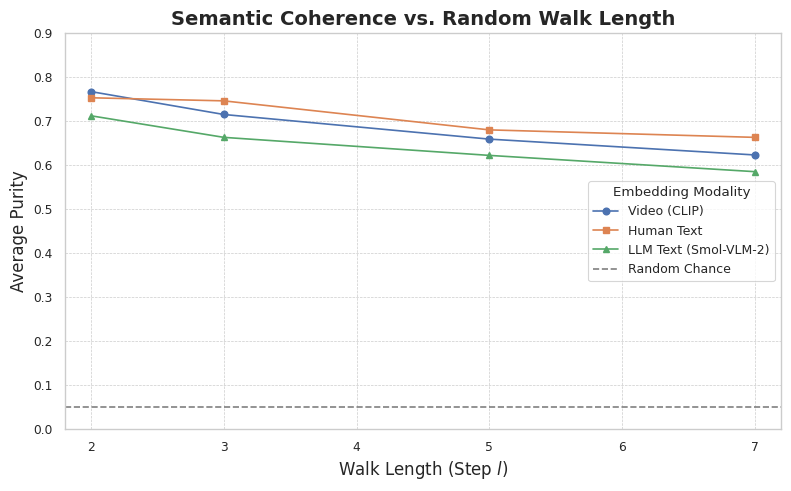

Gráfico com legenda salvo como 'figures/result_graph.pdf'


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Dados para LLM Text
walk_lengths_llm = [2, 3, 5, 7]
purity_llm = [0.712, 0.663, 0.622, 0.585]

# Dados para Human Text
walk_lengths_human = [2, 3, 5, 7]
purity_human = [0.753, 0.746, 0.680, 0.663]

# Dados para Video (usando a versão "Sequencial")
walk_lengths_video = [2, 3, 5, 7]
purity_video = [0.767, 0.715, 0.659, 0.623]

# Número real de categorias do dataset (VCSL)
num_categories = 20
random_chance = 1.0 / num_categories


sns.set_theme(style="whitegrid", context="paper")
plt.figure(figsize=(8, 5))

# Plota cada linha com marcadores e rótulos
plt.plot(walk_lengths_video, purity_video, marker='o', linestyle='-', label='Video (CLIP)')
plt.plot(walk_lengths_human, purity_human, marker='s', linestyle='-', label='Human Text')
plt.plot(walk_lengths_llm,   purity_llm,   marker='^', linestyle='-', label='LLM Text (Smol-VLM-2)')

# Plota a linha de base de chance aleatória
plt.axhline(y=random_chance, color='gray', linestyle='--', label=f'Random Chance')


plt.title('Semantic Coherence vs. Random Walk Length', fontsize=14, weight='bold')
plt.xlabel('Walk Length (Step $l$)', fontsize=12)
plt.ylabel('Average Purity', fontsize=12)

# Define os limites e marcas dos eixos
plt.xlim(1.8, 7.2)
plt.ylim(0, 0.9)
plt.xticks([2, 3, 4, 5, 6, 7])


plt.legend(title='Embedding Modality', fontsize=9, loc='center right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()


# SALVAR A FIGURA
import os
if not os.path.exists('figures'):
    os.makedirs('figures')

plt.savefig('figures/result_graph_legend_fixed.pdf', format='pdf', bbox_inches='tight')
plt.savefig('figures/result_graph_legend_fixed.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

print("Gráfico com legenda salvo como 'figures/result_graph.pdf'")